# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
#Installed pip install citipy
!pip install citipy

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from pprint import pprint

# Import API key
from api_keys import api_key
# api_key = "597f243e55cef477f232b5c47266bd3c"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
cities_json = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
#Creating the base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

In [37]:
#Creating variable lists for recall
weatherdictionary = []

In [38]:
# Create indices representing the cities
indices = list(range(0, len(cities)))
# indices
for x in range(len(cities)):
    print(f"Making request number: {x} for city: {cities[x]}")
    # Get one of the posts
    post_response = requests.get(base_url + str(cities[x]))
    # Save post's JSON
    cities_json.append(post_response.json())

Making request number: 0 for city: pevek
Making request number: 1 for city: sao filipe
Making request number: 2 for city: chapleau
Making request number: 3 for city: egvekinot
Making request number: 4 for city: hilo
Making request number: 5 for city: port alfred
Making request number: 6 for city: busselton
Making request number: 7 for city: bethel
Making request number: 8 for city: burnie
Making request number: 9 for city: nikolskoye
Making request number: 10 for city: werda
Making request number: 11 for city: cabo san lucas
Making request number: 12 for city: amderma
Making request number: 13 for city: ushuaia
Making request number: 14 for city: kapaa
Making request number: 15 for city: tiksi
Making request number: 16 for city: klaksvik
Making request number: 17 for city: tuktoyaktuk
Making request number: 18 for city: luderitz
Making request number: 19 for city: bar-le-duc
Making request number: 20 for city: san patricio
Making request number: 21 for city: torbay
Making request numbe

Making request number: 180 for city: vila franca do campo
Making request number: 181 for city: sao bernardo
Making request number: 182 for city: kamenka
Making request number: 183 for city: mys shmidta
Making request number: 184 for city: cayenne
Making request number: 185 for city: gavrilovka vtoraya
Making request number: 186 for city: saint-augustin
Making request number: 187 for city: champerico
Making request number: 188 for city: yar-sale
Making request number: 189 for city: whitehorse
Making request number: 190 for city: carnarvon
Making request number: 191 for city: cherskiy
Making request number: 192 for city: bambous virieux
Making request number: 193 for city: birjand
Making request number: 194 for city: ust-maya
Making request number: 195 for city: bolungarvik
Making request number: 196 for city: fredericksburg
Making request number: 197 for city: sao joao da barra
Making request number: 198 for city: solnechnyy
Making request number: 199 for city: bolshoy tsaryn
Making req

Making request number: 356 for city: mindyak
Making request number: 357 for city: sembe
Making request number: 358 for city: lorengau
Making request number: 359 for city: cockburn harbour
Making request number: 360 for city: fortuna
Making request number: 361 for city: vao
Making request number: 362 for city: norman wells
Making request number: 363 for city: umm lajj
Making request number: 364 for city: sorong
Making request number: 365 for city: saint-pierre
Making request number: 366 for city: daru
Making request number: 367 for city: saurimo
Making request number: 368 for city: nabire
Making request number: 369 for city: borlange
Making request number: 370 for city: flinders
Making request number: 371 for city: aksu
Making request number: 372 for city: lubao
Making request number: 373 for city: melville
Making request number: 374 for city: praia
Making request number: 375 for city: datong
Making request number: 376 for city: mujiayingzi
Making request number: 377 for city: xichang
M

Making request number: 534 for city: killybegs
Making request number: 535 for city: stuttgart
Making request number: 536 for city: tarlungeni
Making request number: 537 for city: ostrovskoye
Making request number: 538 for city: chunian
Making request number: 539 for city: puttur
Making request number: 540 for city: luganville
Making request number: 541 for city: kurilsk
Making request number: 542 for city: ulladulla
Making request number: 543 for city: sur
Making request number: 544 for city: kamenskoye
Making request number: 545 for city: ariquemes
Making request number: 546 for city: talah
Making request number: 547 for city: sechura
Making request number: 548 for city: liepaja
Making request number: 549 for city: kupino
Making request number: 550 for city: ottawa
Making request number: 551 for city: deep river
Making request number: 552 for city: launceston
Making request number: 553 for city: tuburan
Making request number: 554 for city: gimli
Making request number: 555 for city: xu

In [39]:
#Running a for loop to loop thorugh the various websites to obtain the weather data and converting the data into a json
for city in cities:
    target_url = f"{base_url}&q={city}&appid={api_key}"
#     print(target_url)
    try:
        response = requests.get(target_url).json()
#       pprint(response)
        weatherdictionary.append({"cloudiness": response["clouds"]["all"],
                          "country": response["sys"]["country"],
                           "date": response["dt"],
                           "humidity":response["main"]["humidity"],
                            "latitude": response["main"]["humidity"],
                            "longitude": response["coord"]["lon"],
                            "max_temp":response["main"]["temp_max"],
                            "wind_speed": response["wind"]["speed"]
                          })
#         print(weatherdictionary)
    except:
#         print("Not found")
        pass

In [40]:
print(target_url)

http://api.openweathermap.org/data/2.5/weather?&q=puerto madryn&appid=597f243e55cef477f232b5c47266bd3c


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
weather_summary = pd.DataFrame(weatherdictionary)
weather_summary

,cloudiness,country,date,humidity,latitude,longitude,max_temp,wind_speed
0,88,RU,1553694664,89,89,170.27,263.052,4.56
1,0,CV,1553694664,92,92,-24.50,295.252,5.81
2,75,CA,1553691600,58,58,-83.40,271.150,4.60
3,68,RU,1553694664,87,87,-179.17,268.002,4.56
4,1,US,1553694628,77,77,-155.08,290.370,1.50
5,0,ZA,1553694665,65,65,26.89,298.502,6.21
6,48,AU,1553694621,45,45,115.35,290.370,9.11
7,1,US,1553692260,92,92,-161.76,272.150,3.60
8,64,AU,1553694664,95,95,145.91,284.820,0.89
9,20,RU,1553694636,31,31,30.79,275.370,5.00


In [42]:
#Describe the data in the weather summary dataframe
weather_summary.describe()

,cloudiness,date,humidity,latitude,longitude,max_temp,wind_speed
count,554.000000,5.540000e+02,554.000000,554.000000,554.000000,554.000000,554.000000
mean,39.572202,1.553694e+09,70.227437,70.227437,18.009946,286.656422,3.808646
std,34.475864,1.281239e+03,22.191805,22.191805,89.203765,13.770329,2.640674
min,0.000000,1.553689e+09,9.000000,9.000000,-179.170000,243.402000,0.160000
25%,1.000000,1.553694e+09,57.000000,57.000000,-62.832500,275.150500,1.822500
50%,36.000000,1.553695e+09,74.000000,74.000000,22.880000,289.202000,3.210000
75%,75.000000,1.553695e+09,89.000000,89.000000,96.820000,298.151500,5.100000
max,100.000000,1.553695e+09,100.000000,100.000000,179.320000,312.902000,19.000000


In [43]:
#Display weather summary data
weather_summary.head()

,cloudiness,country,date,humidity,latitude,longitude,max_temp,wind_speed
0,88,RU,1553694664,89,89,170.27,263.052,4.56
1,0,CV,1553694664,92,92,-24.50,295.252,5.81
2,75,CA,1553691600,58,58,-83.40,271.150,4.60
3,68,RU,1553694664,87,87,-179.17,268.002,4.56
4,1,US,1553694628,77,77,-155.08,290.370,1.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

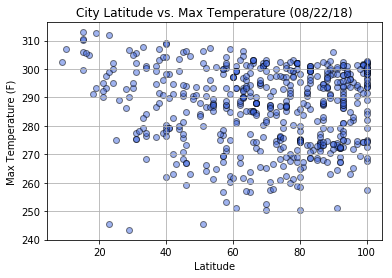

In [44]:
latitude = weather_summary["latitude"]
max_temp =weather_summary["max_temp"]
#Create scatter plot using recall of lists
plt.scatter(latitude, max_temp, marker="o", c="royalblue", edgecolors="black", alpha=0.5)
#Label scatterplot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
#Add gridlines
plt.grid(True)
#Save the figure as png file
plt.savefig("latitude-max temperature.png")
#Display figure
plt.show()

#### Latitude vs. Humidity Plot

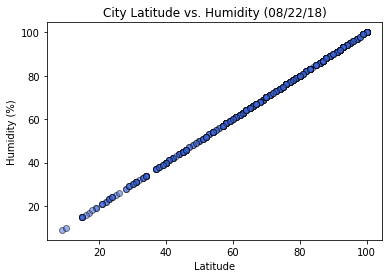

In [45]:
latitude = weather_summary["latitude"]
humidity = weather_summary["humidity"]
#Create scatter plot using recall of lists
plt.scatter(latitude, humidity, marker="o", c="royalblue", edgecolors="black", alpha=0.5)
#Label scatterplot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (08/22/18)")
#Add gridlines
plt.grid
#Save the figure as png file
plt.savefig("latitude-humidity.png")
#Display figure
plt.show()

#### Latitude vs. Cloudiness Plot

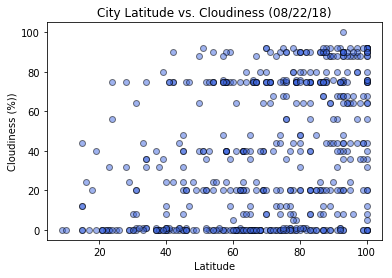

In [46]:
latitude = weather_summary["latitude"]
cloudiness =weather_summary["cloudiness"]
#Create scatter plot using recall of lists
plt.scatter(latitude, cloudiness, marker="o", c="royalblue", edgecolors="black", alpha=0.5)
#Label scatterplot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
#Add gridlines
plt.grid
#Save the figure as png file
plt.savefig("latitude-cloudiness.png")
#Display figure
plt.show()

#### Latitude vs. Wind Speed Plot

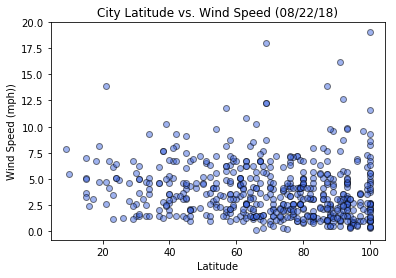

In [47]:
latitude = weather_summary["latitude"]
wind_speed =weather_summary["wind_speed"]
#Create scatter plot using recall of lists
plt.scatter(latitude, wind_speed, marker="o", c="royalblue", edgecolors="black", alpha=0.5)
#Label scatterplot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.title("City Latitude vs. Wind Speed (08/22/18)")
#Add gridlines
plt.grid
#Save the figure as png file
plt.savefig("latitude-windspeed.png")
#Display figure
plt.show()

In [48]:
# Output File (CSV)
weather_summary.to_csv("weather_summary.csv", index=False, header=True)